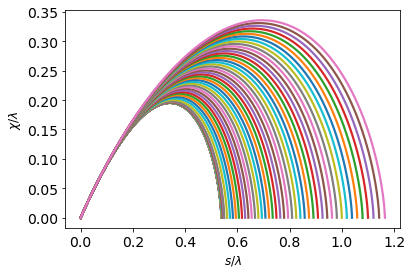

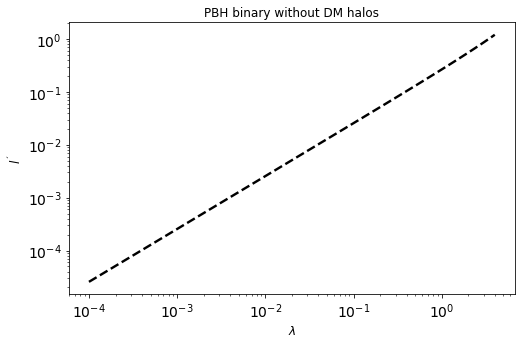

In [10]:
# Tidal torque exerted by the neighbouring PBH in the PBH binaries without dark matter 
# halos and decoupling around matter-radiation equality.


# Solution of eq.(14) using eq.(6) for PBH binaries without DM halos given in paper 
# "The merger rate of primordial-black-hole binaries".


#Variation of  l^{'} with λ for the PBH binary without DM halos decoupling 
# around matter-radiation equality.


import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

π=np.pi
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kg.m^-3
G=6.67e-11            # in units of m^3.kg^-1.s^-2
a_eq=2.9374e-4        # scale factor corresponding to matter radiation equlaity




λ_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,
        0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,
        2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0]


def h(s):
    return math.sqrt((s**-3)+(s**-4)) 

def g(s):
    return  -((3*s+4)/(2*h(s)*(s**5))) #g(s)=h'(s).

def H(s):
    return (1/((s**4)*h(s)))


def s_osc(λ_0):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b=(3*λ_0)/100000
    ss= np.linspace(1e-12,(2*λ_0),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        B=(Bs[i])
        c=As[i]
        if B<0:
            break
    C=c*λ_0                     
    return C


s_list=np.zeros(len(λ_list))    
for k, λ_0 in enumerate(λ_list):
    s_list[k] = s_osc(λ_0)         #s at which the PBHs cross each other for the first time in  
                                          # the binary.

        
def integral(λ_0,s):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,s,1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.rc('lines', linewidth=2.2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.plot(As,Bs,'')
    plt.xlabel('$s/λ$',fontsize=12)
    plt.ylabel('$χ/λ$',fontsize=12)
    χ=separations**2
    s_list=ss.tolist()
    H_list=np.zeros(len(s_list))
    for i, s in enumerate(s_list):
        H_list[i] = H(s)
    integrand=( χ*H_list)
    x=np.trapz(integrand,s_list)
    return x
     

l_list=np.zeros(len(λ_list))
for i, (λ_0,s) in enumerate(zip(λ_list,s_list)):
    l_list[i] = integral(λ_0,s)
    

    
    
    
plt.rc('lines', linewidth=2.4)    
plt.figure(figsize=(8,5))
plt.loglog(λ_list,l_list,'k--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$λ$',fontsize=12)
plt.ylabel('$l^{´}$',fontsize=12)
plt.title('PBH binary without DM halos')
plt.savefig("1.pdf")
plt.show()   

p=  
0.01131 x + 0.2552


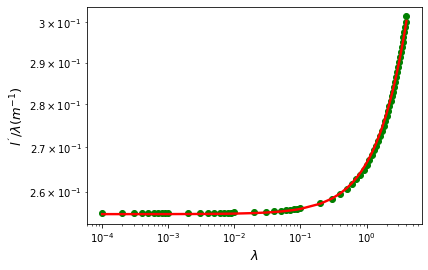

Maximum Percentage error in the numerical and fitted value of l^{´}/λ= 8.730 %


In [11]:
# Fitting of the the curve for the value of l^{'}/λ vs λ for the PBH binary without dark matter 
# halos.

x = np.array(λ_list)
y = np.array(l_list) 
Y = np.array(y/x)



z = np.polyfit(x, Y, 1)
p = np.poly1d(z)
print("p=",p)




plt.loglog(x,Y,'go')
plt.plot(x,p(x),'r')

plt.yscale('log')

plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l^{´}/λ(m^{-1})$',fontsize=13)
plt.show()

# This gives the fitted value of l^{'} as, l^{'}= (0.2552λ + 0.01131(λ**2))m^{-1}.



l=len(λ_list)


#Calculation of the Percentage error in the numerical and fitted value of l^{´}/λ for PBH binary without 
#dark matter halos.

def mape(numerical, fitted): 
    numerical, fitted = np.array(numerical), np.array(fitted)
    return np.mean(np.abs((numerical - fitted) / numerical)) * 100
numerical = Y
fitted = p(x)
max_error=(l*(mape(numerical,fitted)))     #Maximum Percentage error 


print("Maximum Percentage error in the numerical and fitted value of l^{´}/λ=",'%0.3f'%max_error,"%")

p=            2
0.0003227 x + 0.01023 x + 0.2554


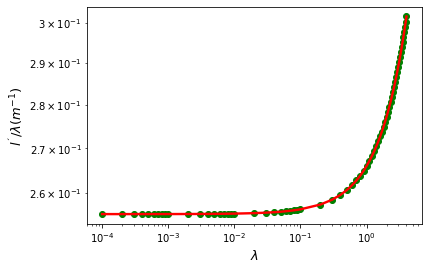

Maximum Percentage error in the numerical and fitted value of l^{´}/λ= 0.167 %


In [12]:
# Fitting of the the curve for the value of l^{'}/λ vs λ for the PBH binary without dark matter 
# halos.

x = np.array(λ_list)
y = np.array(l_list) 
Y = np.array(y/x)



z = np.polyfit(x, Y, 2)
p = np.poly1d(z)
print("p=",p)




plt.loglog(x,Y,'go')
plt.plot(x,p(x),'r')

plt.yscale('log')

plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l^{´}/λ(m^{-1})$',fontsize=13)
plt.show()

# This gives the fitted value of l^{'} as, l^{'}= (0.2554λ + 0.01023(λ**2))m^{-1}.



l=len(λ_list)


#Calculation of the Percentage error in the numerical and fitted value of l^{´}/λ for PBH binary without 
#dark matter halos.

def mape(numerical, fitted): 
    numerical, fitted = np.array(numerical), np.array(fitted)
    return np.mean(np.abs((numerical - fitted) / numerical)) * 100
numerical = Y
fitted = p(x)
max_error=(l*(mape(numerical,fitted)))     #Maximum Percentage error 


print("Maximum Percentage error in the numerical and fitted value of l^{´}/λ=",'%0.3f'%max_error,"%")

p=            3             2
6.856e-06 x + 0.0002849 x + 0.01028 x + 0.2554


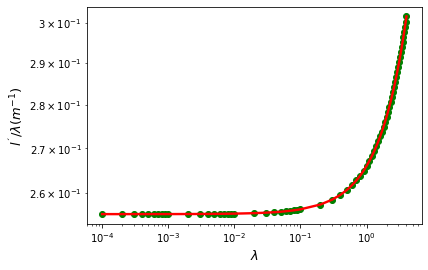

Maximum Percentage error in the numerical and fitted value of l^{´}/λ= 0.009 %


In [13]:
# Fitting of the the curve for the value of l^{'}/λ vs λ for the PBH binary without dark matter 
# halos.

x = np.array(λ_list)
y = np.array(l_list) 
Y = np.array(y/x)



z = np.polyfit(x, Y, 3)
p = np.poly1d(z)
print("p=",p)




plt.loglog(x,Y,'go')
plt.plot(x,p(x),'r')

plt.yscale('log')

plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l^{´}/λ(m^{-1})$',fontsize=13)
plt.show()

# This gives the fitted value of l^{'} as, l^{'}= (0.2554λ + 0.01028(λ**2))m^{-1}.



l=len(λ_list)


#Calculation of the Percentage error in the numerical and fitted value of l^{´}/λ for PBH binary without 
#dark matter halos.

def mape(numerical, fitted): 
    numerical, fitted = np.array(numerical), np.array(fitted)
    return np.mean(np.abs((numerical - fitted) / numerical)) * 100
numerical = Y
fitted = p(x)
max_error=(l*(mape(numerical,fitted)))     #Maximum Percentage error 


print("Maximum Percentage error in the numerical and fitted value of l^{´}/λ=",'%0.3f'%max_error,"%")

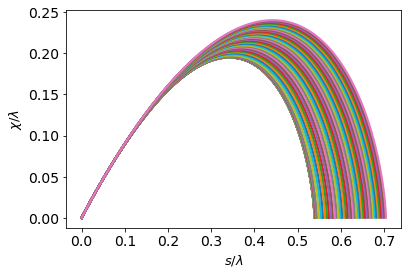

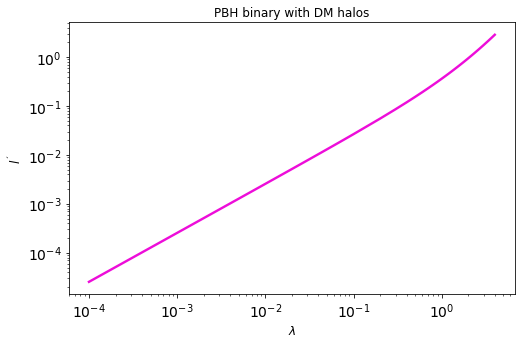

In [14]:
# Tidal torque exerted by the neighbouring PBH in the PBH binaries with dark matter 
# halos and decoupling around matter-radiation equality.


# Solution of eq.(56) using extended mass function in reference pdf "Angular momentum 
#  in the PBH binary".

#Variation of  l^{'} with λ for the PBH binary with DM halos decoupling 
# around matter-radiation equality.

A=(((3/(8*G*π*rho_eq))**(1/2)))
B=((((8*π*G*rho_eq*((t_eq)**6))/3)**(1/4)))
C=B/A

def I(s):
    return ((math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))*H(s))


def m(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)
                                *math.sqrt(s+1))+(4/3))))

def n_mr(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))
                   
def  k_mr(s):
    return (1/n_mr(s))

def λ_mr(s):
    return λ_0*k_mr(s)
   


def s_osc(λ_0):
    def f(u,s,λ_0):
            return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_mr(s)
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(1) in reference pdf "M_DM at s_dec".
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,(2*λ_0),1000000) 
    us= odeint(f,separation0,ss,args=(λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        B=(Bs[i])
        d=As[i]
        if B<0:
            break
    D=d*λ_0        
    return D

s_halo_list=np.zeros(len(λ_list))  
for k, λ_0 in enumerate(λ_list):
    s_halo_list[k] = s_osc(λ_0)      #s at which the PBHs cross each other for the first time in  
                                     # the binary.

        
def integral(λ_0,s):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_mr(s)
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(56) in reference pdf "Angular momentum in the PBH binary".

    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,s,1000000)
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.rc('lines', linewidth=2.2)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.plot(As,Bs,'')
    plt.xlabel('$s/λ$',fontsize=13)
    plt.ylabel('$χ/λ$',fontsize=13)
    χ=separations**2
    s_list=ss.tolist()
    m_list=np.zeros(len(s_list))
    H_list=np.zeros(len(s_list))
    I_list=np.zeros(len(s_list))
    for i, s in enumerate(s_list):
        H_list[i] = H(s)
        I_list[i] = I(s)
        m_list[i] = m(s)
    integrand_1=(χ*H_list*m(s))
    integrand_2=(χ*I_list*m(s)) 
    x=np.trapz(integrand_1,s_list)     # 1st integral in eq.(56) in reference pdf "Angular momentum in the PBH binary".
    z=np.trapz(integrand_2,s_list)     # 2nd integral in eq.(56) in reference pdf "Angular momentum in the PBH binary".
    Y=(x)+(z*C)
    return Y
    

l_mr=np.zeros(len(λ_list))
for i, (λ_0,s) in enumerate(zip(λ_list,s_halo_list)):
    l_mr[i] = integral(λ_0,s)

    
    
plt.rc('lines', linewidth=2.4)
plt.figure(figsize=(8,5))
plt.loglog(λ_list,l_mr,'#ED0DD9')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$λ$',fontsize=12)
plt.ylabel('$l^{´}$',fontsize=12)
plt.title('PBH binary with DM halos') 
plt.show()

p=  
0.1123 x + 0.2529


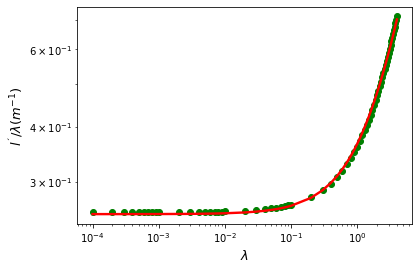

Percentage error in the numerical and fitted value of l^{´}/λ= 60.842 %


In [15]:
# Fitting of the the curve for the value of l^{'}/λ vs λ for the PBH binary with dark matter 
# halos.

x_halo = np.array(λ_list)
y_halo = np.array(l_mr) 
Y_halo = np.array(y_halo/x_halo)



z = np.polyfit(x_halo, Y_halo, 1)
p_halo = np.poly1d(z)
print("p=",p_halo)




plt.loglog(x_halo,Y_halo,'go')
plt.plot(x_halo,p_halo(x_halo),'r')

plt.yscale('log')

plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l^{´}/λ(m^{-1})$',fontsize=13)
plt.show()

# This gives the fitted value of l^{'} as, l^{'}= (0.2529λ + 0.1123(λ**2))m^{-1}.

l=len(λ_list)


#Calculation of the Percentage error in the numerical and fitted value of l^{´}/λ for PBH binary without 
#dark matter halos.
def mape(numerical, fitted): 
    numerical, fitted = np.array(numerical), np.array(fitted)
    return np.mean(np.abs((numerical - fitted) / numerical)) * 100
numerical = Y_halo
fitted = p_halo(x_halo)
max_error=(l*(mape(numerical,fitted)))     #Maximum Percentage error 

print("Percentage error in the numerical and fitted value of l^{´}/λ=",'%0.3f'%max_error,"%")

p=           2
0.003175 x + 0.1017 x + 0.2554


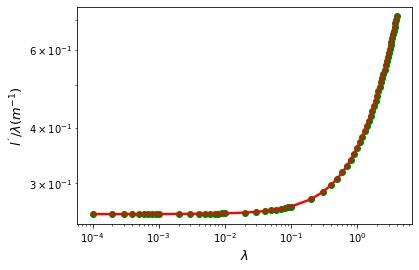

Percentage error in the numerical and fitted value of l^{´}/λ= 0.445 %


In [16]:
# Fitting of the the curve for the value of l^{'}/λ vs λ for the PBH binary with dark matter 
# halos.

x_halo = np.array(λ_list)
y_halo = np.array(l_mr) 
Y_halo = np.array(y_halo/x_halo)



z = np.polyfit(x_halo, Y_halo, 2)
p_halo = np.poly1d(z)
print("p=",p_halo)




plt.loglog(x_halo,Y_halo,'go')
plt.plot(x_halo,p_halo(x_halo),'r')

plt.yscale('log')

plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l^{´}/λ(m^{-1})$',fontsize=13)
plt.show()

# This gives the fitted value of l^{'} as, l^{'}= (0.2554λ + 0.1017(λ**2))m^{-1}.

l=len(λ_list)


#Calculation of the Percentage error in the numerical and fitted value of l^{´}/λ for PBH binary without 
#dark matter halos.
def mape(numerical, fitted): 
    numerical, fitted = np.array(numerical), np.array(fitted)
    return np.mean(np.abs((numerical - fitted) / numerical)) * 100
numerical = Y_halo
fitted = p_halo(x_halo)
max_error=(l*(mape(numerical,fitted)))     #Maximum Percentage error 

print("Percentage error in the numerical and fitted value of l^{´}/λ=",'%0.3f'%max_error,"%")

p=           3            2
2.31e-05 x + 0.003047 x + 0.1019 x + 0.2554


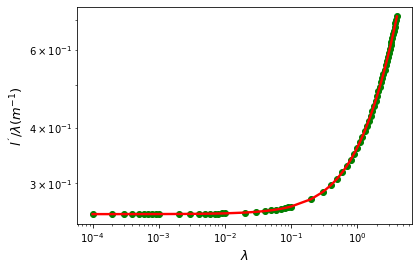

Percentage error in the numerical and fitted value of l^{´}/λ= 0.116 %


In [17]:
# Fitting of the the curve for the value of l^{'}/λ vs λ for the PBH binary with dark matter 
# halos.

x_halo = np.array(λ_list)
y_halo = np.array(l_mr) 
Y_halo = np.array(y_halo/x_halo)



z = np.polyfit(x_halo, Y_halo, 3)
p_halo = np.poly1d(z)
print("p=",p_halo)




plt.loglog(x_halo,Y_halo,'go')
plt.plot(x_halo,p_halo(x_halo),'r')

plt.yscale('log')

plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l^{´}/λ(m^{-1})$',fontsize=13)
plt.show()

# This gives the fitted value of l^{'} as, l^{'}= (0.2554λ + 0.1019(λ**2))m^{-1}.

l=len(λ_list)


#Calculation of the Percentage error in the numerical and fitted value of l^{´}/λ for PBH binary without 
#dark matter halos.
def mape(numerical, fitted): 
    numerical, fitted = np.array(numerical), np.array(fitted)
    return np.mean(np.abs((numerical - fitted) / numerical)) * 100
numerical = Y_halo
fitted = p_halo(x_halo)
max_error=(l*(mape(numerical,fitted)))     #Maximum Percentage error 

print("Percentage error in the numerical and fitted value of l^{´}/λ=",'%0.3f'%max_error,"%")

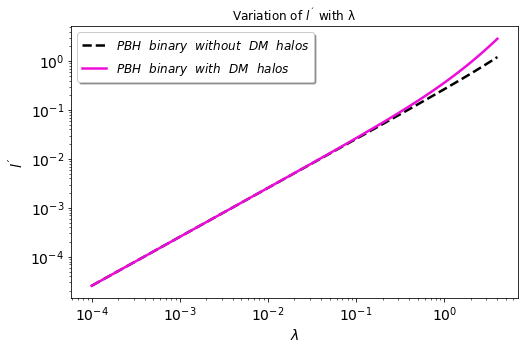

In [18]:
#Variation of l^{'} with λ for the PBH binaries with and without DM halos decoupling 
# upto matter-radiation equality.

plt.rc('lines', linewidth=2.5)
plt.figure(figsize=(8,5))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.loglog(λ_list,l_list,'k--')
plt.loglog(λ_list, l_mr,'#ED0DD9')
plt.xlabel('$λ$',fontsize=14)
plt.ylabel('$l^{´}$',fontsize=14)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} without\hspace{0.7} DM\hspace{0.7} halos$','$PBH\hspace{0.7} binary\hspace{0.7} with\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :12},
              loc='upper left',shadow = True,
               facecolor = 'white',fontsize=16)        

plt.title('Variation of $l^{´}$ with λ')
plt.savefig("2.pdf")
plt.show()